<a href="https://colab.research.google.com/github/ojasrai17/ML_Lab_A1_10/blob/main/ML_Linear_Reg_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Gradient Descent Algorithm
### Name: Rishi Pande A-14

## Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ex1data1.csv',names = ['Population','Profit'])

In [ ]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
x = np.array(df['Population'])
y = np.array(df['Profit'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
print(f"x_train has {x_train.shape[0]} elements")

x_train has 77 elements


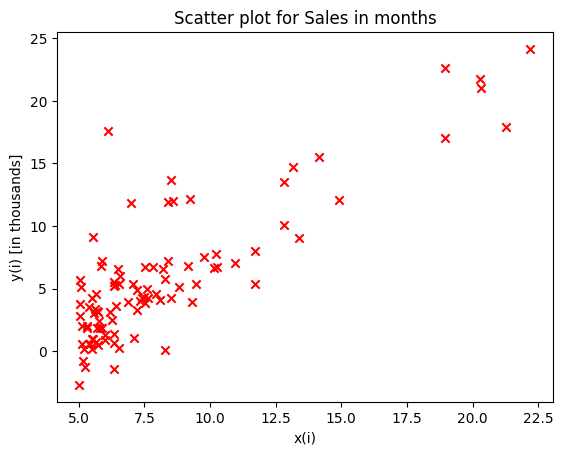

In [ ]:
plt.scatter(x, y, c='r', marker='x')
plt.xlabel('x(i)')
plt.ylabel('y(i) [in thousands]')
plt.title('Scatter plot for Sales in months')
plt.show()

### 1. Define the model [ f(w,b) ]


In [ ]:
def compute_model_output(x, w, b):
    return w * x + b

### 2. Define cost function [ J(w,b) ]

In [ ]:
def cost_function(y_cap,y_train):
  m = y_train.shape[0]
  error_sq = (y_cap - y_train)**2
  J_wb = np.mean(error_sq)/(2*m)
  return J_wb

### 3. Define value updation [ i.e. compute gradient and update the w,b ]


In [ ]:
def value_update(learn_rate, y_cap, y_train, w, b, x0_train, x_train):
    error = y_cap - y_train
    m = x_train.shape[0]

    # Update bias (b)
    b_update = b - (learn_rate * np.dot(error, x0_train)) / m

    # Update weight (w)
    w_update = w - (learn_rate * np.dot(error, x_train)) / m

    return b_update, w_update

### 4. Define gradient descent alogrithm

In [ ]:
def gradient_descent(learn_rate, w, b, x_train, y_train, max_itr):
    m = x_train.shape[0]
    x0_train = np.ones(m)  # Bias term

    # Initial calculation
    y_cap = compute_model_output(x_train, w, b)
    J_wb = cost_function(y_cap, y_train)

    # Print initial state
    print(f"Initial state: w = {w}, b = {b}, J_wb = {J_wb}")

    for i in range(max_itr):
        # Update parameters
        b_new, w_new = value_update(learn_rate, y_cap, y_train, w, b, x0_train, x_train)

        # Recompute predictions and cost function
        y_cap = compute_model_output(x_train, w_new, b_new)
        J_wb_previous = J_wb
        J_wb = cost_function(y_cap, y_train)

        # Print the current state for debugging
        print(f"Iteration {i + 1}: w = {w_new}, b = {b_new}, J_wb = {J_wb}")

        # Check if cost increased (early stopping)
        if J_wb > J_wb_previous:
            print("Cost increased; stopping early.")
            return w, b, J_wb_previous, y_cap

        # Update w and b for next iteration
        w = w_new
        b = b_new

    return w, b, J_wb, y_cap


#### test functions

In [ ]:
w,b=0,5.84;
tmp_f_wb = compute_model_output(x_train,w,b)
tmp_f_wb

array([5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84,
       5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84, 5.84])

In [ ]:
tmp_J_wb = cost_function(tmp_f_wb,y_train)
tmp_J_wb

0.17943611499252826

#### Define parameter values and perform GDA

In [ ]:
learning_rate = 0.01
max_itr = 100
x0_train = np.ones(x_train.shape[0])

In [ ]:
w, b, J_wb, y_cap = gradient_descent(learning_rate, w, b, x_train, y_train, max_itr)
print(w, b, J_wb)

Initial state: w = 0, b = 5.84, J_wb = 0.17943611499252826
Iteration 1: w = 0.1379043676809091, b = 5.837963748051948, J_wb = 0.16441040687562208
Iteration 2: w = 0.16756968440341108, b = 5.82477637802964, J_wb = 0.1634508332894377
Iteration 3: w = 0.17498395309970066, b = 5.8093177271472936, J_wb = 0.1630866446657435
Iteration 4: w = 0.177822294168287, b = 5.793413041051266, J_wb = 0.16274866934371102
Iteration 5: w = 0.1797178902689598, b = 5.777437470939466, J_wb = 0.16241285514204853
Iteration 6: w = 0.18141755755995487, b = 5.7614680963812095, J_wb = 0.16207818236342844
Iteration 7: w = 0.18307481006412737, b = 5.745520727397548, J_wb = 0.16174460449384065
Iteration 8: w = 0.18472120659289737, b = 5.729598579907796, J_wb = 0.16141211614956855
Iteration 9: w = 0.18636323765706117, b = 5.7137022811275955, J_wb = 0.16108071369590304
Iteration 10: w = 0.18800224089004589, b = 5.697831926211321, J_wb = 0.16075039358316248
Iteration 11: w = 0.1896384947286843, b = 5.681987501001594, J_w

#### Plot Best Fit Line

Text(0.5, 1.0, 'Best Fit Line')

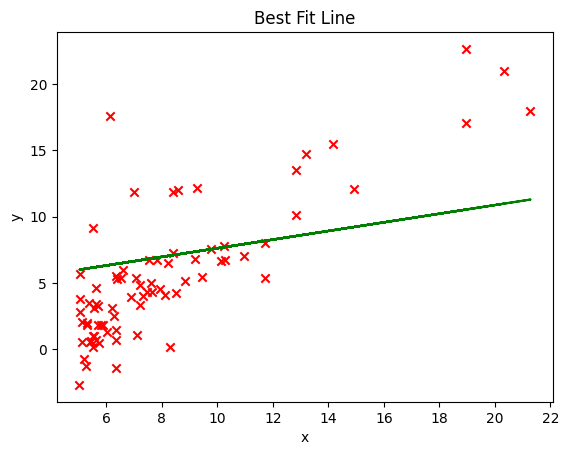

In [ ]:
# Plot the line
plt.plot(x_train, y_cap, color = 'green')
plt.scatter(x_train, y_train, c='r', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')

## Linear Regression

In [ ]:
x= x_train
y= y_train
w = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(y) - w*np.mean(x)

In [ ]:
y_pred = w*x_test + b

Text(0.5, 1.0, 'Best Fit Line')

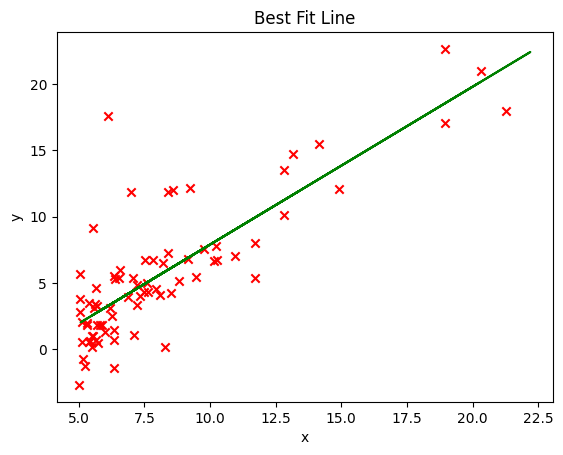

In [ ]:
# Plot the line
plt.plot(x_test, y_pred, color = 'green')
plt.scatter(x_train, y_train, c='r', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')